<h1 style = "color: skyblue">Flight Price Prediction ML Kaggle</h1>

<h2 style = "color: skyblue">Libraries & Dataset Needed</h2>

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import seaborn as sns

In [2]:
flights = pd.read_csv('./flights_data.csv')
flights.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h2 style = "color: skyblue">Data Visualization</h2>

In [3]:
flights.isna().sum() # no NaN values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
flights.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


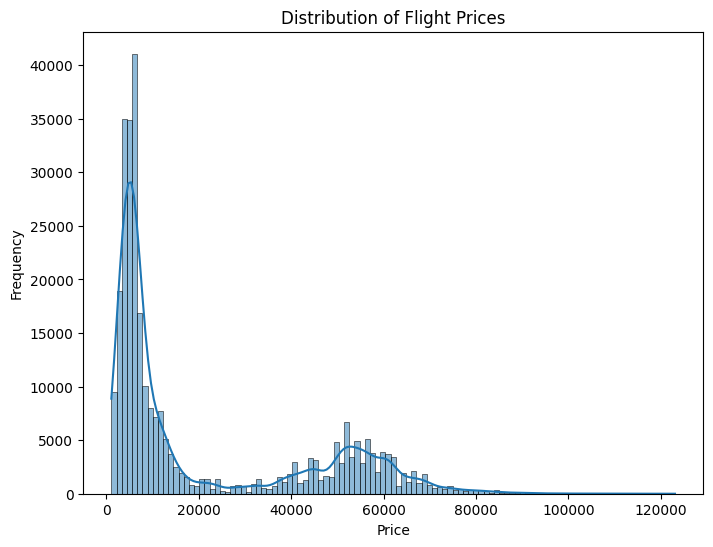

In [6]:
# Plotting the distribution of flight prices
plt.figure(figsize=(8, 6))
sns.histplot(flights['price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


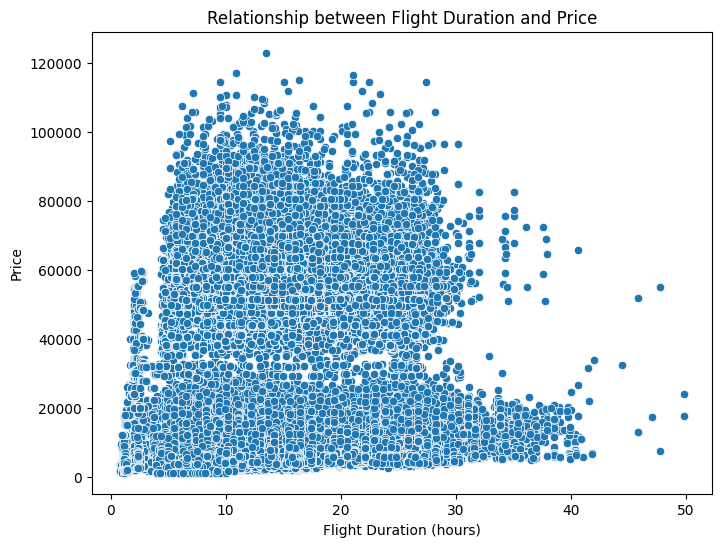

In [7]:
# Plotting the relationship between flight duration and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='price', data=flights)
plt.title('Relationship between Flight Duration and Price')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Price')
plt.show()


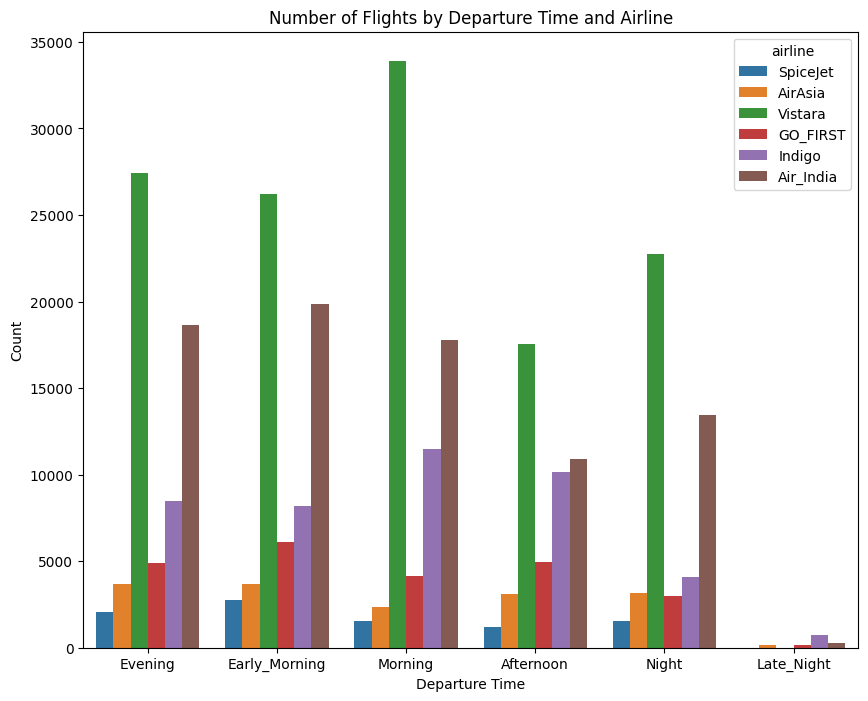

In [8]:
# Plotting the distribution of flights across departure times and airlines
plt.figure(figsize=(10, 8))
sns.countplot(x='departure_time', hue='airline', data=flights)
plt.title('Number of Flights by Departure Time and Airline')
plt.xlabel('Departure Time')
plt.ylabel('Count')
plt.show()

<h2 style = "color: skyblue">Preprocessing</h2>

In [9]:
# apply OrdinalEncoder

encoder = OrdinalEncoder()
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
encoded_features = encoder.fit_transform(flights[categorical_features])
encoded_features

array([[4., 2., 2., ..., 5., 5., 1.],
       [4., 2., 1., ..., 4., 5., 1.],
       [0., 2., 1., ..., 1., 5., 1.],
       ...,
       [5., 1., 1., ..., 5., 3., 0.],
       [5., 1., 1., ..., 2., 3., 0.],
       [5., 1., 4., ..., 2., 3., 0.]])

In [10]:
# combine catherigocal and numerical features together
final_features = pd.concat([flights[['duration', 'days_left', 'price']], pd.DataFrame(encoded_features)], axis=1)
final_features

,duration,days_left,price,0,1,2,3,4,5,6
0,2.17,1,5953,4.0,2.0,2.0,2.0,5.0,5.0,1.0
1,2.33,1,5953,4.0,2.0,1.0,2.0,4.0,5.0,1.0
2,2.17,1,5956,0.0,2.0,1.0,2.0,1.0,5.0,1.0
3,2.25,1,5955,5.0,2.0,4.0,2.0,0.0,5.0,1.0
4,2.33,1,5955,5.0,2.0,4.0,2.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,5.0,1.0,4.0,0.0,2.0,3.0,0.0
300149,10.42,49,77105,5.0,1.0,0.0,0.0,5.0,3.0,0.0
300150,13.83,49,79099,5.0,1.0,1.0,0.0,5.0,3.0,0.0
300151,10.00,49,81585,5.0,1.0,1.0,0.0,2.0,3.0,0.0


In [11]:
# features and target variable
X = final_features.drop('price', axis = 1)
y = final_features['price']

X

,duration,days_left,0,1,2,3,4,5,6
0,2.17,1,4.0,2.0,2.0,2.0,5.0,5.0,1.0
1,2.33,1,4.0,2.0,1.0,2.0,4.0,5.0,1.0
2,2.17,1,0.0,2.0,1.0,2.0,1.0,5.0,1.0
3,2.25,1,5.0,2.0,4.0,2.0,0.0,5.0,1.0
4,2.33,1,5.0,2.0,4.0,2.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
300148,10.08,49,5.0,1.0,4.0,0.0,2.0,3.0,0.0
300149,10.42,49,5.0,1.0,0.0,0.0,5.0,3.0,0.0
300150,13.83,49,5.0,1.0,1.0,0.0,5.0,3.0,0.0
300151,10.00,49,5.0,1.0,1.0,0.0,2.0,3.0,0.0


In [12]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [13]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h2 style = "color: skyblue">Training, prediction and testing</h2>

In [14]:
# training the model

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make a prediction
y_pred = lin_reg.predict(X_test)

In [15]:
# Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = mse**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 49200540.29372204
Root Mean Squared Error (RMSE): 7014.309680483322
